## First create network


In [1]:
from yawning_titan.networks.node import Node
from yawning_titan.networks.network import Network

In [2]:
# Instantiate the Network
network = Network(
    set_random_entry_nodes=True,
    num_of_random_entry_nodes=3,
    set_random_high_value_nodes=True,
    num_of_random_high_value_nodes=2,
    set_random_vulnerabilities=True,
)

# Instantiate the Node's and add them to the Network
router_1 = Node("Router 1")
network.add_node(router_1)


switch_1 = Node("Switch 1")
network.add_node(switch_1)
switch_1.x_pos = 0.01
switch_1.y_pos = 0.61

switch_2 = Node("Switch 2")
network.add_node(switch_2)
switch_2.y_pos = -0.62 

pc_1 = Node("PC 1")
network.add_node(pc_1)
pc_1.x_pos = -0.38
pc_1.y_pos = 0.69

pc_2 = Node("PC 2")
network.add_node(pc_2)
pc_2.x_pos = 0.18
pc_2.y_pos = 1.00

pc_3 = Node("PC 3")
network.add_node(pc_3)
pc_3.x_pos = 0.39
pc_3.y_pos = 0.70

pc_4 = Node("PC 4")
network.add_node(pc_4)
pc_4.x_pos = -0.39
pc_4.y_pos = -0.69

pc_5 = Node("PC 5")
network.add_node(pc_5)
pc_5.x_pos = 0.38
pc_5.y_pos = -0.69

pc_6 = Node("PC 6")
network.add_node(pc_6)
pc_6.x_pos = -0.19
pc_6.y_pos = -1.00

server_1 = Node("Server 1")
network.add_node(server_1)
server_1.x_pos = -0.17
server_1.y_pos = 0.99

server_2 = Node("Server 2")
network.add_node(server_2)
server_2.x_pos = 0.17
server_2.y_pos = -1.00

# Add the edges between Node's
network.add_edge(router_1, switch_1)
network.add_edge(switch_1, server_1)
network.add_edge(switch_1, pc_1)
network.add_edge(switch_1, pc_2)
network.add_edge(switch_1, pc_3)
network.add_edge(router_1, switch_2)
network.add_edge(switch_2, server_2)
network.add_edge(switch_2, pc_4)
network.add_edge(switch_2, pc_5)
network.add_edge(switch_2, pc_6)

# Reset the entry nodes, high value nodes, and vulnerability scores by calling .setup()
network.reset()

# View the Networks Node Details
network.show(verbose=True)



UUID                                  Name      High Value Node    Entry Node      Vulnerability  Position (x,y)
------------------------------------  --------  -----------------  ------------  ---------------  ----------------
e8b8d6b4-9078-4fff-b039-b94631ed5e57  Router 1  True               False                0.689895  0.00, 0.00
b07f9828-0fe6-465a-8d3a-512a5feea783  Switch 1  False              False                0.430328  0.01, 0.61
a56584f5-50d2-411f-b2be-2f216c87f7a8  Switch 2  False              False                0.839482  0.00, -0.62
018dab3e-ed96-4bbb-a006-3255d6ccc258  PC 1      False              False                0.693289  -0.38, 0.69
7606a163-71c7-4265-afa9-e5dcddb6b27f  PC 2      False              True                 0.254101  0.18, 1.00
d7eec66e-b0a0-4a8e-b15e-a9026c729773  PC 3      False              False                0.475056  0.39, 0.70
01ed5e66-b260-4dd4-9a1e-125b9fd3e31c  PC 4      False              True                 0.843232  -0.39, -0.69
b4559

## Creating environment and training


In [3]:
# load notebook extension
%load_ext tensorboard

In [4]:
#Import packages - SB3
import time
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import A2C, DQN, PPO
from stable_baselines3.ppo import MlpPolicy as PPOMlp

from yawning_titan.envs.generic.core.blue_interface import BlueInterface
from yawning_titan.envs.generic.core.red_interface import RedInterface
from yawning_titan.envs.generic.generic_env import GenericNetworkEnv
from yawning_titan.envs.generic.core.action_loops import ActionLoop
from yawning_titan.envs.generic.core.network_interface import NetworkInterface
from yawning_titan.networks.network_db import default_18_node_network
from yawning_titan.game_modes.game_mode_db import default_game_mode
from yawning_titan.envs.generic.core.action_loops import ActionLoop

C:\Users\olive\yawning_titan\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
## Select game mode
game_mode = default_game_mode()

In [6]:
## Build network interface
network_interface = NetworkInterface(game_mode=game_mode, network=network)

In [7]:
## Name agents
red = RedInterface(network_interface)
blue = BlueInterface(network_interface)

In [8]:
## Create environment
env = GenericNetworkEnv(red, blue, network_interface)

In [9]:
## Check compliant with OpenAI gym
check_env(env, warn=True)
_ = env.reset()

In [10]:
## Initialise environment callback
eval_callback = EvalCallback(Monitor(env), eval_freq=1000, deterministic=False, render=False)

In [11]:
## Create agent
agent = PPO(PPOMlp, env, verbose=1, tensorboard_log="./logs/ppo_YT_initial_tensorboard/")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [12]:
## Train agent for 1M timesteps
agent.learn(total_timesteps=1000000, n_eval_episodes=1, callback=eval_callback)
%tensorboard --logdir ./logs/ppo_YT_initial_tensorboard/

Logging to ./logs/ppo_YT_initial_tensorboard/PPO_3
Eval num_timesteps=1000, episode_reward=-108.47 +/- 9.63
Episode length: 9.20 +/- 9.87
---------------------------------
| eval/              |          |
|    mean_ep_length  | 9.2      |
|    mean_reward     | -108     |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-107.08 +/- 7.51
Episode length: 11.20 +/- 6.14
---------------------------------
| eval/              |          |
|    mean_ep_length  | 11.2     |
|    mean_reward     | -107     |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.6     |
|    ep_rew_mean     | -110     |
| time/              |          |
|    fps             | 124      |
|    iterations      | 1        |
|    time_elapse

New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 12.7     |
|    ep_rew_mean     | -105     |
| time/              |          |
|    fps             | 304      |
|    iterations      | 6        |
|    time_elapsed    | 40       |
|    total_timesteps | 12288    |
---------------------------------
Eval num_timesteps=13000, episode_reward=-105.42 +/- 5.09
Episode length: 6.80 +/- 5.42
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 6.8        |
|    mean_reward          | -105       |
| time/                   |            |
|    total_timesteps      | 13000      |
| train/                  |            |
|    approx_kl            | 0.01215865 |
|    clip_fraction        | 0.0667     |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.16      |
|    explained_variance   | 4.77e-06   |
|    learning_rate        | 0.0003     |
|    loss        

Eval num_timesteps=24000, episode_reward=-101.87 +/- 3.47
Episode length: 7.40 +/- 3.20
---------------------------------
| eval/              |          |
|    mean_ep_length  | 7.4      |
|    mean_reward     | -102     |
| time/              |          |
|    total_timesteps | 24000    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.4     |
|    ep_rew_mean     | -101     |
| time/              |          |
|    fps             | 337      |
|    iterations      | 12       |
|    time_elapsed    | 72       |
|    total_timesteps | 24576    |
---------------------------------
Eval num_timesteps=25000, episode_reward=-101.68 +/- 4.25
Episode length: 11.20 +/- 6.01
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 11.2        |
|    mean_reward          | -102        |
| time/                   |             |
|    total_timesteps      | 25000  

Eval num_timesteps=35000, episode_reward=-99.22 +/- 2.40
Episode length: 16.40 +/- 11.34
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 16.4      |
|    mean_reward          | -99.2     |
| time/                   |           |
|    total_timesteps      | 35000     |
| train/                  |           |
|    approx_kl            | 0.0098559 |
|    clip_fraction        | 0.144     |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.78     |
|    explained_variance   | 9.42e-06  |
|    learning_rate        | 0.0003    |
|    loss                 | 13        |
|    n_updates            | 170       |
|    policy_gradient_loss | -0.0179   |
|    value_loss           | 29.5      |
---------------------------------------
Eval num_timesteps=36000, episode_reward=-98.58 +/- 0.93
Episode length: 9.80 +/- 6.71
---------------------------------
| eval/              |          |
|    mean_ep_length  | 9.8      |
| 

Eval num_timesteps=47000, episode_reward=-97.17 +/- 0.82
Episode length: 13.00 +/- 4.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 13       |
|    mean_reward     | -97.2    |
| time/              |          |
|    total_timesteps | 47000    |
---------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.8     |
|    ep_rew_mean     | -98.6    |
| time/              |          |
|    fps             | 348      |
|    iterations      | 23       |
|    time_elapsed    | 135      |
|    total_timesteps | 47104    |
---------------------------------
Eval num_timesteps=48000, episode_reward=-98.91 +/- 3.90
Episode length: 17.00 +/- 6.63
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 17          |
|    mean_reward          | -98.9       |
| time/                   |             |
|    total_tim

Eval num_timesteps=58000, episode_reward=-98.78 +/- 1.72
Episode length: 12.80 +/- 10.36
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 12.8        |
|    mean_reward          | -98.8       |
| time/                   |             |
|    total_timesteps      | 58000       |
| train/                  |             |
|    approx_kl            | 0.010013619 |
|    clip_fraction        | 0.095       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.55       |
|    explained_variance   | 0.115       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.43        |
|    n_updates            | 280         |
|    policy_gradient_loss | -0.0136     |
|    value_loss           | 23.5        |
-----------------------------------------
Eval num_timesteps=59000, episode_reward=-96.92 +/- 1.08
Episode length: 13.20 +/- 6.94
---------------------------------
| eval/              |          |

Eval num_timesteps=69000, episode_reward=-97.37 +/- 2.98
Episode length: 13.00 +/- 7.40
---------------------------------
| eval/              |          |
|    mean_ep_length  | 13       |
|    mean_reward     | -97.4    |
| time/              |          |
|    total_timesteps | 69000    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.6     |
|    ep_rew_mean     | -97.7    |
| time/              |          |
|    fps             | 358      |
|    iterations      | 34       |
|    time_elapsed    | 194      |
|    total_timesteps | 69632    |
---------------------------------
Eval num_timesteps=70000, episode_reward=-97.62 +/- 0.88
Episode length: 7.20 +/- 2.93
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 7.2        |
|    mean_reward          | -97.6      |
| time/                   |            |
|    total_timesteps      | 70000      |
|

Eval num_timesteps=80000, episode_reward=-97.11 +/- 1.37
Episode length: 15.00 +/- 10.79
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 15           |
|    mean_reward          | -97.1        |
| time/                   |              |
|    total_timesteps      | 80000        |
| train/                  |              |
|    approx_kl            | 0.0077182166 |
|    clip_fraction        | 0.0687       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.5         |
|    explained_variance   | 0.246        |
|    learning_rate        | 0.0003       |
|    loss                 | 8.53         |
|    n_updates            | 390          |
|    policy_gradient_loss | -0.0154      |
|    value_loss           | 24.4         |
------------------------------------------
Eval num_timesteps=81000, episode_reward=-96.33 +/- 0.63
Episode length: 10.00 +/- 1.67
---------------------------------
| eval/        

Eval num_timesteps=92000, episode_reward=-98.57 +/- 1.98
Episode length: 14.40 +/- 9.67
---------------------------------
| eval/              |          |
|    mean_ep_length  | 14.4     |
|    mean_reward     | -98.6    |
| time/              |          |
|    total_timesteps | 92000    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15.3     |
|    ep_rew_mean     | -97.3    |
| time/              |          |
|    fps             | 364      |
|    iterations      | 45       |
|    time_elapsed    | 252      |
|    total_timesteps | 92160    |
---------------------------------
Eval num_timesteps=93000, episode_reward=-97.00 +/- 1.16
Episode length: 12.40 +/- 6.12
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 12.4        |
|    mean_reward          | -97         |
| time/                   |             |
|    total_timesteps      | 93000   

Eval num_timesteps=103000, episode_reward=-97.03 +/- 1.54
Episode length: 8.00 +/- 3.52
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 8           |
|    mean_reward          | -97         |
| time/                   |             |
|    total_timesteps      | 103000      |
| train/                  |             |
|    approx_kl            | 0.013362846 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.42       |
|    explained_variance   | 0.112       |
|    learning_rate        | 0.0003      |
|    loss                 | 19.1        |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 36.1        |
-----------------------------------------
Eval num_timesteps=104000, episode_reward=-97.88 +/- 1.81
Episode length: 10.60 +/- 6.25
---------------------------------
| eval/              |          |

Eval num_timesteps=114000, episode_reward=-93.58 +/- 1.95
Episode length: 17.80 +/- 6.52
---------------------------------
| eval/              |          |
|    mean_ep_length  | 17.8     |
|    mean_reward     | -93.6    |
| time/              |          |
|    total_timesteps | 114000   |
---------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 15.2     |
|    ep_rew_mean     | -96.7    |
| time/              |          |
|    fps             | 372      |
|    iterations      | 56       |
|    time_elapsed    | 307      |
|    total_timesteps | 114688   |
---------------------------------
Eval num_timesteps=115000, episode_reward=-98.08 +/- 2.43
Episode length: 12.00 +/- 7.56
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 12          |
|    mean_reward          | -98.1       |
| time/                   |             |
|    total_t

Eval num_timesteps=125000, episode_reward=-96.00 +/- 4.72
Episode length: 20.40 +/- 15.51
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 20.4        |
|    mean_reward          | -96         |
| time/                   |             |
|    total_timesteps      | 125000      |
| train/                  |             |
|    approx_kl            | 0.009905076 |
|    clip_fraction        | 0.0812      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.16       |
|    explained_variance   | 0.18        |
|    learning_rate        | 0.0003      |
|    loss                 | 26.5        |
|    n_updates            | 610         |
|    policy_gradient_loss | -0.017      |
|    value_loss           | 63.8        |
-----------------------------------------
Eval num_timesteps=126000, episode_reward=-95.09 +/- 3.63
Episode length: 13.20 +/- 9.58
---------------------------------
| eval/              |         

Eval num_timesteps=137000, episode_reward=-94.51 +/- 3.55
Episode length: 19.20 +/- 10.07
---------------------------------
| eval/              |          |
|    mean_ep_length  | 19.2     |
|    mean_reward     | -94.5    |
| time/              |          |
|    total_timesteps | 137000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 16.8     |
|    ep_rew_mean     | -96      |
| time/              |          |
|    fps             | 368      |
|    iterations      | 67       |
|    time_elapsed    | 372      |
|    total_timesteps | 137216   |
---------------------------------
Eval num_timesteps=138000, episode_reward=-97.66 +/- 1.61
Episode length: 13.00 +/- 7.92
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 13          |
|    mean_reward          | -97.7       |
| time/                   |             |
|    total_timesteps      | 13800

Eval num_timesteps=148000, episode_reward=-94.33 +/- 6.78
Episode length: 19.40 +/- 22.76
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 19.4        |
|    mean_reward          | -94.3       |
| time/                   |             |
|    total_timesteps      | 148000      |
| train/                  |             |
|    approx_kl            | 0.009580988 |
|    clip_fraction        | 0.0807      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | 0.222       |
|    learning_rate        | 0.0003      |
|    loss                 | 28          |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 74.3        |
-----------------------------------------
Eval num_timesteps=149000, episode_reward=-95.08 +/- 4.14
Episode length: 17.00 +/- 16.42
---------------------------------
| eval/              |        

Eval num_timesteps=159000, episode_reward=-95.61 +/- 3.77
Episode length: 11.20 +/- 7.55
---------------------------------
| eval/              |          |
|    mean_ep_length  | 11.2     |
|    mean_reward     | -95.6    |
| time/              |          |
|    total_timesteps | 159000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.4     |
|    ep_rew_mean     | -95      |
| time/              |          |
|    fps             | 365      |
|    iterations      | 78       |
|    time_elapsed    | 437      |
|    total_timesteps | 159744   |
---------------------------------
Eval num_timesteps=160000, episode_reward=-92.84 +/- 3.11
Episode length: 18.20 +/- 5.64
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 18.2        |
|    mean_reward          | -92.8       |
| time/                   |             |
|    total_timesteps      | 160000

Eval num_timesteps=170000, episode_reward=-92.48 +/- 4.54
Episode length: 32.00 +/- 31.05
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 32          |
|    mean_reward          | -92.5       |
| time/                   |             |
|    total_timesteps      | 170000      |
| train/                  |             |
|    approx_kl            | 0.008192968 |
|    clip_fraction        | 0.0947      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.85       |
|    explained_variance   | 0.212       |
|    learning_rate        | 0.0003      |
|    loss                 | 34.3        |
|    n_updates            | 830         |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 83.3        |
-----------------------------------------
Eval num_timesteps=171000, episode_reward=-96.71 +/- 2.23
Episode length: 11.40 +/- 9.99
---------------------------------
| eval/              |         

Eval num_timesteps=182000, episode_reward=-97.31 +/- 1.49
Episode length: 8.60 +/- 3.88
---------------------------------
| eval/              |          |
|    mean_ep_length  | 8.6      |
|    mean_reward     | -97.3    |
| time/              |          |
|    total_timesteps | 182000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.4     |
|    ep_rew_mean     | -94.6    |
| time/              |          |
|    fps             | 364      |
|    iterations      | 89       |
|    time_elapsed    | 499      |
|    total_timesteps | 182272   |
---------------------------------
Eval num_timesteps=183000, episode_reward=-96.44 +/- 2.03
Episode length: 9.20 +/- 4.12
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 9.2        |
|    mean_reward          | -96.4      |
| time/                   |            |
|    total_timesteps      | 183000     |


Eval num_timesteps=193000, episode_reward=-92.89 +/- 8.55
Episode length: 26.80 +/- 25.55
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 26.8        |
|    mean_reward          | -92.9       |
| time/                   |             |
|    total_timesteps      | 193000      |
| train/                  |             |
|    approx_kl            | 0.010447769 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.7        |
|    explained_variance   | 0.164       |
|    learning_rate        | 0.0003      |
|    loss                 | 39.8        |
|    n_updates            | 940         |
|    policy_gradient_loss | -0.0193     |
|    value_loss           | 88.7        |
-----------------------------------------
Eval num_timesteps=194000, episode_reward=-95.89 +/- 2.22
Episode length: 11.80 +/- 6.11
---------------------------------
| eval/              |         

Eval num_timesteps=204000, episode_reward=-94.46 +/- 4.76
Episode length: 15.40 +/- 13.32
---------------------------------
| eval/              |          |
|    mean_ep_length  | 15.4     |
|    mean_reward     | -94.5    |
| time/              |          |
|    total_timesteps | 204000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 17.4     |
|    ep_rew_mean     | -95.1    |
| time/              |          |
|    fps             | 364      |
|    iterations      | 100      |
|    time_elapsed    | 561      |
|    total_timesteps | 204800   |
---------------------------------
Eval num_timesteps=205000, episode_reward=-93.61 +/- 4.74
Episode length: 25.80 +/- 24.62
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 25.8        |
|    mean_reward          | -93.6       |
| time/                   |             |
|    total_timesteps      | 2050

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.3     |
|    ep_rew_mean     | -94.3    |
| time/              |          |
|    fps             | 362      |
|    iterations      | 105      |
|    time_elapsed    | 593      |
|    total_timesteps | 215040   |
---------------------------------
Eval num_timesteps=216000, episode_reward=-98.15 +/- 0.49
Episode length: 6.00 +/- 1.41
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 6           |
|    mean_reward          | -98.1       |
| time/                   |             |
|    total_timesteps      | 216000      |
| train/                  |             |
|    approx_kl            | 0.012587482 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.62       |
|    explained_variance   | 0.196       |
|    learning_rate        | 0.0003      |
|    loss                 

Eval num_timesteps=227000, episode_reward=-95.66 +/- 2.95
Episode length: 14.60 +/- 8.36
---------------------------------
| eval/              |          |
|    mean_ep_length  | 14.6     |
|    mean_reward     | -95.7    |
| time/              |          |
|    total_timesteps | 227000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.7     |
|    ep_rew_mean     | -94.5    |
| time/              |          |
|    fps             | 362      |
|    iterations      | 111      |
|    time_elapsed    | 626      |
|    total_timesteps | 227328   |
---------------------------------
Eval num_timesteps=228000, episode_reward=-90.52 +/- 4.67
Episode length: 46.40 +/- 39.52
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 46.4        |
|    mean_reward          | -90.5       |
| time/                   |             |
|    total_timesteps      | 22800

Eval num_timesteps=238000, episode_reward=-96.78 +/- 2.20
Episode length: 9.60 +/- 6.53
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 9.6         |
|    mean_reward          | -96.8       |
| time/                   |             |
|    total_timesteps      | 238000      |
| train/                  |             |
|    approx_kl            | 0.012392931 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.5        |
|    explained_variance   | 0.0851      |
|    learning_rate        | 0.0003      |
|    loss                 | 34.2        |
|    n_updates            | 1160        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 78.1        |
-----------------------------------------
Eval num_timesteps=239000, episode_reward=-91.48 +/- 8.43
Episode length: 28.40 +/- 33.06
---------------------------------
| eval/              |          

Eval num_timesteps=249000, episode_reward=-94.83 +/- 8.41
Episode length: 16.60 +/- 26.78
---------------------------------
| eval/              |          |
|    mean_ep_length  | 16.6     |
|    mean_reward     | -94.8    |
| time/              |          |
|    total_timesteps | 249000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.6     |
|    ep_rew_mean     | -94.4    |
| time/              |          |
|    fps             | 359      |
|    iterations      | 122      |
|    time_elapsed    | 694      |
|    total_timesteps | 249856   |
---------------------------------
Eval num_timesteps=250000, episode_reward=-96.65 +/- 3.64
Episode length: 9.80 +/- 9.04
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 9.8         |
|    mean_reward          | -96.6       |
| time/                   |             |
|    total_timesteps      | 250000

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.8     |
|    ep_rew_mean     | -94.7    |
| time/              |          |
|    fps             | 360      |
|    iterations      | 127      |
|    time_elapsed    | 722      |
|    total_timesteps | 260096   |
---------------------------------
Eval num_timesteps=261000, episode_reward=-87.05 +/- 14.39
Episode length: 46.20 +/- 50.33
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 46.2        |
|    mean_reward          | -87         |
| time/                   |             |
|    total_timesteps      | 261000      |
| train/                  |             |
|    approx_kl            | 0.012534758 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.132       |
|    learning_rate        | 0.0003      |
|    loss              

Eval num_timesteps=272000, episode_reward=-96.01 +/- 2.22
Episode length: 12.40 +/- 5.95
---------------------------------
| eval/              |          |
|    mean_ep_length  | 12.4     |
|    mean_reward     | -96      |
| time/              |          |
|    total_timesteps | 272000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.9     |
|    ep_rew_mean     | -94.5    |
| time/              |          |
|    fps             | 358      |
|    iterations      | 133      |
|    time_elapsed    | 759      |
|    total_timesteps | 272384   |
---------------------------------
Eval num_timesteps=273000, episode_reward=-94.61 +/- 2.57
Episode length: 18.60 +/- 10.89
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 18.6        |
|    mean_reward          | -94.6       |
| time/                   |             |
|    total_timesteps      | 27300

Eval num_timesteps=283000, episode_reward=-91.53 +/- 8.01
Episode length: 22.60 +/- 22.46
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 22.6        |
|    mean_reward          | -91.5       |
| time/                   |             |
|    total_timesteps      | 283000      |
| train/                  |             |
|    approx_kl            | 0.014346642 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.254       |
|    learning_rate        | 0.0003      |
|    loss                 | 36.9        |
|    n_updates            | 1380        |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 69.9        |
-----------------------------------------
Eval num_timesteps=284000, episode_reward=-91.22 +/- 3.35
Episode length: 23.20 +/- 9.24
---------------------------------
| eval/              |         

Eval num_timesteps=294000, episode_reward=-97.03 +/- 2.56
Episode length: 9.60 +/- 7.39
---------------------------------
| eval/              |          |
|    mean_ep_length  | 9.6      |
|    mean_reward     | -97      |
| time/              |          |
|    total_timesteps | 294000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.2     |
|    ep_rew_mean     | -93.6    |
| time/              |          |
|    fps             | 352      |
|    iterations      | 144      |
|    time_elapsed    | 836      |
|    total_timesteps | 294912   |
---------------------------------
Eval num_timesteps=295000, episode_reward=-97.58 +/- 3.02
Episode length: 17.40 +/- 12.37
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 17.4        |
|    mean_reward          | -97.6       |
| time/                   |             |
|    total_timesteps      | 295000

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.3     |
|    ep_rew_mean     | -93.8    |
| time/              |          |
|    fps             | 352      |
|    iterations      | 149      |
|    time_elapsed    | 865      |
|    total_timesteps | 305152   |
---------------------------------
Eval num_timesteps=306000, episode_reward=-94.37 +/- 4.52
Episode length: 18.60 +/- 10.56
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 18.6        |
|    mean_reward          | -94.4       |
| time/                   |             |
|    total_timesteps      | 306000      |
| train/                  |             |
|    approx_kl            | 0.008347581 |
|    clip_fraction        | 0.0922      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.281       |
|    learning_rate        | 0.0003      |
|    loss               

Eval num_timesteps=317000, episode_reward=-97.91 +/- 1.72
Episode length: 8.80 +/- 4.02
---------------------------------
| eval/              |          |
|    mean_ep_length  | 8.8      |
|    mean_reward     | -97.9    |
| time/              |          |
|    total_timesteps | 317000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.8     |
|    ep_rew_mean     | -93.4    |
| time/              |          |
|    fps             | 352      |
|    iterations      | 155      |
|    time_elapsed    | 901      |
|    total_timesteps | 317440   |
---------------------------------
Eval num_timesteps=318000, episode_reward=-91.14 +/- 7.26
Episode length: 27.60 +/- 25.85
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 27.6        |
|    mean_reward          | -91.1       |
| time/                   |             |
|    total_timesteps      | 318000

Eval num_timesteps=328000, episode_reward=-94.74 +/- 6.56
Episode length: 17.80 +/- 15.55
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 17.8        |
|    mean_reward          | -94.7       |
| time/                   |             |
|    total_timesteps      | 328000      |
| train/                  |             |
|    approx_kl            | 0.009741891 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.32       |
|    explained_variance   | -0.024      |
|    learning_rate        | 0.0003      |
|    loss                 | 21.6        |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 75.4        |
-----------------------------------------
Eval num_timesteps=329000, episode_reward=-86.69 +/- 4.88
Episode length: 38.80 +/- 20.76
---------------------------------
| eval/              |        

Eval num_timesteps=339000, episode_reward=-95.72 +/- 3.55
Episode length: 11.00 +/- 7.77
---------------------------------
| eval/              |          |
|    mean_ep_length  | 11       |
|    mean_reward     | -95.7    |
| time/              |          |
|    total_timesteps | 339000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.7     |
|    ep_rew_mean     | -94.1    |
| time/              |          |
|    fps             | 351      |
|    iterations      | 166      |
|    time_elapsed    | 967      |
|    total_timesteps | 339968   |
---------------------------------
Eval num_timesteps=340000, episode_reward=-97.46 +/- 1.48
Episode length: 13.00 +/- 11.22
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 13          |
|    mean_reward          | -97.5       |
| time/                   |             |
|    total_timesteps      | 34000

Eval num_timesteps=351000, episode_reward=-90.41 +/- 6.68
Episode length: 28.80 +/- 22.26
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 28.8         |
|    mean_reward          | -90.4        |
| time/                   |              |
|    total_timesteps      | 351000       |
| train/                  |              |
|    approx_kl            | 0.0114489775 |
|    clip_fraction        | 0.11         |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.25        |
|    explained_variance   | 0.13         |
|    learning_rate        | 0.0003       |
|    loss                 | 25.6         |
|    n_updates            | 1710         |
|    policy_gradient_loss | -0.0182      |
|    value_loss           | 83.1         |
------------------------------------------
Eval num_timesteps=352000, episode_reward=-92.89 +/- 3.20
Episode length: 20.00 +/- 4.20
---------------------------------
| eval/      

Eval num_timesteps=362000, episode_reward=-90.38 +/- 7.00
Episode length: 37.00 +/- 26.86
---------------------------------
| eval/              |          |
|    mean_ep_length  | 37       |
|    mean_reward     | -90.4    |
| time/              |          |
|    total_timesteps | 362000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | -93.4    |
| time/              |          |
|    fps             | 350      |
|    iterations      | 177      |
|    time_elapsed    | 1035     |
|    total_timesteps | 362496   |
---------------------------------
Eval num_timesteps=363000, episode_reward=-92.68 +/- 8.45
Episode length: 23.40 +/- 22.02
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 23.4        |
|    mean_reward          | -92.7       |
| time/                   |             |
|    total_timesteps      | 3630

Eval num_timesteps=373000, episode_reward=-95.02 +/- 2.98
Episode length: 13.00 +/- 8.41
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 13          |
|    mean_reward          | -95         |
| time/                   |             |
|    total_timesteps      | 373000      |
| train/                  |             |
|    approx_kl            | 0.012943923 |
|    clip_fraction        | 0.13        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.266       |
|    learning_rate        | 0.0003      |
|    loss                 | 36.1        |
|    n_updates            | 1820        |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 71.3        |
-----------------------------------------
Eval num_timesteps=374000, episode_reward=-88.81 +/- 4.52
Episode length: 30.60 +/- 12.91
---------------------------------
| eval/              |         

Eval num_timesteps=384000, episode_reward=-97.06 +/- 2.54
Episode length: 10.80 +/- 10.03
---------------------------------
| eval/              |          |
|    mean_ep_length  | 10.8     |
|    mean_reward     | -97.1    |
| time/              |          |
|    total_timesteps | 384000   |
---------------------------------
Eval num_timesteps=385000, episode_reward=-92.31 +/- 10.84
Episode length: 28.40 +/- 40.36
---------------------------------
| eval/              |          |
|    mean_ep_length  | 28.4     |
|    mean_reward     | -92.3    |
| time/              |          |
|    total_timesteps | 385000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.2     |
|    ep_rew_mean     | -94      |
| time/              |          |
|    fps             | 349      |
|    iterations      | 188      |
|    time_elapsed    | 1102     |
|    total_timesteps | 385024   |
---------------------------------
Eva

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.4     |
|    ep_rew_mean     | -93.4    |
| time/              |          |
|    fps             | 347      |
|    iterations      | 193      |
|    time_elapsed    | 1136     |
|    total_timesteps | 395264   |
---------------------------------
Eval num_timesteps=396000, episode_reward=-94.01 +/- 5.65
Episode length: 23.20 +/- 26.32
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 23.2        |
|    mean_reward          | -94         |
| time/                   |             |
|    total_timesteps      | 396000      |
| train/                  |             |
|    approx_kl            | 0.010999848 |
|    clip_fraction        | 0.119       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.0761      |
|    learning_rate        | 0.0003      |
|    loss               

Eval num_timesteps=407000, episode_reward=-92.98 +/- 7.41
Episode length: 20.40 +/- 23.31
---------------------------------
| eval/              |          |
|    mean_ep_length  | 20.4     |
|    mean_reward     | -93      |
| time/              |          |
|    total_timesteps | 407000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 17.1     |
|    ep_rew_mean     | -94.3    |
| time/              |          |
|    fps             | 349      |
|    iterations      | 199      |
|    time_elapsed    | 1167     |
|    total_timesteps | 407552   |
---------------------------------
Eval num_timesteps=408000, episode_reward=-94.24 +/- 3.43
Episode length: 16.60 +/- 10.38
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 16.6        |
|    mean_reward          | -94.2       |
| time/                   |             |
|    total_timesteps      | 4080

Eval num_timesteps=418000, episode_reward=-87.85 +/- 9.89
Episode length: 42.00 +/- 35.57
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 42          |
|    mean_reward          | -87.9       |
| time/                   |             |
|    total_timesteps      | 418000      |
| train/                  |             |
|    approx_kl            | 0.012227735 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.0309      |
|    learning_rate        | 0.0003      |
|    loss                 | 31.4        |
|    n_updates            | 2040        |
|    policy_gradient_loss | -0.0153     |
|    value_loss           | 91.3        |
-----------------------------------------
Eval num_timesteps=419000, episode_reward=-85.32 +/- 4.98
Episode length: 38.40 +/- 11.07
---------------------------------
| eval/              |        

Eval num_timesteps=430000, episode_reward=-91.04 +/- 4.00
Episode length: 31.40 +/- 14.43
---------------------------------
| eval/              |          |
|    mean_ep_length  | 31.4     |
|    mean_reward     | -91      |
| time/              |          |
|    total_timesteps | 430000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.5     |
|    ep_rew_mean     | -93.2    |
| time/              |          |
|    fps             | 346      |
|    iterations      | 210      |
|    time_elapsed    | 1242     |
|    total_timesteps | 430080   |
---------------------------------
Eval num_timesteps=431000, episode_reward=-96.49 +/- 3.55
Episode length: 11.80 +/- 8.13
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 11.8        |
|    mean_reward          | -96.5       |
| time/                   |             |
|    total_timesteps      | 43100

Eval num_timesteps=441000, episode_reward=-93.03 +/- 4.32
Episode length: 29.00 +/- 21.88
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 29         |
|    mean_reward          | -93        |
| time/                   |            |
|    total_timesteps      | 441000     |
| train/                  |            |
|    approx_kl            | 0.00993385 |
|    clip_fraction        | 0.114      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.07      |
|    explained_variance   | 0.0727     |
|    learning_rate        | 0.0003     |
|    loss                 | 32.9       |
|    n_updates            | 2150       |
|    policy_gradient_loss | -0.016     |
|    value_loss           | 84.1       |
----------------------------------------
Eval num_timesteps=442000, episode_reward=-90.79 +/- 3.22
Episode length: 27.60 +/- 13.60
---------------------------------
| eval/              |          |
|    mean_ep_l

Eval num_timesteps=452000, episode_reward=-88.77 +/- 8.78
Episode length: 49.20 +/- 49.84
---------------------------------
| eval/              |          |
|    mean_ep_length  | 49.2     |
|    mean_reward     | -88.8    |
| time/              |          |
|    total_timesteps | 452000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.3     |
|    ep_rew_mean     | -93.3    |
| time/              |          |
|    fps             | 344      |
|    iterations      | 221      |
|    time_elapsed    | 1312     |
|    total_timesteps | 452608   |
---------------------------------
Eval num_timesteps=453000, episode_reward=-88.41 +/- 10.99
Episode length: 34.00 +/- 34.87
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 34          |
|    mean_reward          | -88.4       |
| time/                   |             |
|    total_timesteps      | 453

Eval num_timesteps=463000, episode_reward=-94.08 +/- 4.12
Episode length: 18.60 +/- 10.95
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 18.6        |
|    mean_reward          | -94.1       |
| time/                   |             |
|    total_timesteps      | 463000      |
| train/                  |             |
|    approx_kl            | 0.010049658 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.05       |
|    explained_variance   | 0.275       |
|    learning_rate        | 0.0003      |
|    loss                 | 47.5        |
|    n_updates            | 2260        |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 90.3        |
-----------------------------------------
Eval num_timesteps=464000, episode_reward=-93.83 +/- 4.56
Episode length: 14.80 +/- 10.13
---------------------------------
| eval/              |        

Eval num_timesteps=475000, episode_reward=-92.18 +/- 3.12
Episode length: 23.60 +/- 13.09
---------------------------------
| eval/              |          |
|    mean_ep_length  | 23.6     |
|    mean_reward     | -92.2    |
| time/              |          |
|    total_timesteps | 475000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 27.7     |
|    ep_rew_mean     | -91      |
| time/              |          |
|    fps             | 343      |
|    iterations      | 232      |
|    time_elapsed    | 1381     |
|    total_timesteps | 475136   |
---------------------------------
Eval num_timesteps=476000, episode_reward=-94.66 +/- 3.51
Episode length: 12.60 +/- 8.06
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 12.6       |
|    mean_reward          | -94.7      |
| time/                   |            |
|    total_timesteps      | 476000    

Eval num_timesteps=486000, episode_reward=-74.04 +/- 23.50
Episode length: 84.00 +/- 85.61
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 84          |
|    mean_reward          | -74         |
| time/                   |             |
|    total_timesteps      | 486000      |
| train/                  |             |
|    approx_kl            | 0.013115242 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.174       |
|    learning_rate        | 0.0003      |
|    loss                 | 37.8        |
|    n_updates            | 2370        |
|    policy_gradient_loss | -0.0191     |
|    value_loss           | 78.2        |
-----------------------------------------
New best mean reward!
Eval num_timesteps=487000, episode_reward=-85.35 +/- 11.19
Episode length: 38.40 +/- 28.64
---------------------------------
| eval

Eval num_timesteps=497000, episode_reward=-95.00 +/- 2.62
Episode length: 15.60 +/- 8.40
---------------------------------
| eval/              |          |
|    mean_ep_length  | 15.6     |
|    mean_reward     | -95      |
| time/              |          |
|    total_timesteps | 497000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.4     |
|    ep_rew_mean     | -93.6    |
| time/              |          |
|    fps             | 342      |
|    iterations      | 243      |
|    time_elapsed    | 1454     |
|    total_timesteps | 497664   |
---------------------------------
Eval num_timesteps=498000, episode_reward=-93.93 +/- 1.94
Episode length: 16.00 +/- 2.90
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 16          |
|    mean_reward          | -93.9       |
| time/                   |             |
|    total_timesteps      | 498000

Eval num_timesteps=508000, episode_reward=-93.97 +/- 2.59
Episode length: 18.20 +/- 9.13
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 18.2       |
|    mean_reward          | -94        |
| time/                   |            |
|    total_timesteps      | 508000     |
| train/                  |            |
|    approx_kl            | 0.01375236 |
|    clip_fraction        | 0.131      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.19      |
|    explained_variance   | 0.172      |
|    learning_rate        | 0.0003     |
|    loss                 | 42.1       |
|    n_updates            | 2480       |
|    policy_gradient_loss | -0.0212    |
|    value_loss           | 86.6       |
----------------------------------------
Eval num_timesteps=509000, episode_reward=-95.20 +/- 1.71
Episode length: 11.60 +/- 2.42
---------------------------------
| eval/              |          |
|    mean_ep_len

Eval num_timesteps=520000, episode_reward=-88.32 +/- 8.87
Episode length: 37.00 +/- 27.71
---------------------------------
| eval/              |          |
|    mean_ep_length  | 37       |
|    mean_reward     | -88.3    |
| time/              |          |
|    total_timesteps | 520000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.1     |
|    ep_rew_mean     | -93.5    |
| time/              |          |
|    fps             | 341      |
|    iterations      | 254      |
|    time_elapsed    | 1522     |
|    total_timesteps | 520192   |
---------------------------------
Eval num_timesteps=521000, episode_reward=-96.67 +/- 2.50
Episode length: 12.20 +/- 4.87
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 12.2       |
|    mean_reward          | -96.7      |
| time/                   |            |
|    total_timesteps      | 521000    

Eval num_timesteps=531000, episode_reward=-88.73 +/- 10.21
Episode length: 36.40 +/- 37.23
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 36.4        |
|    mean_reward          | -88.7       |
| time/                   |             |
|    total_timesteps      | 531000      |
| train/                  |             |
|    approx_kl            | 0.009839259 |
|    clip_fraction        | 0.1         |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.106       |
|    learning_rate        | 0.0003      |
|    loss                 | 31.8        |
|    n_updates            | 2590        |
|    policy_gradient_loss | -0.0169     |
|    value_loss           | 82.2        |
-----------------------------------------
Eval num_timesteps=532000, episode_reward=-93.02 +/- 4.91
Episode length: 19.40 +/- 16.84
---------------------------------
| eval/              |       

Eval num_timesteps=542000, episode_reward=-94.60 +/- 10.38
Episode length: 64.20 +/- 60.49
---------------------------------
| eval/              |          |
|    mean_ep_length  | 64.2     |
|    mean_reward     | -94.6    |
| time/              |          |
|    total_timesteps | 542000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22       |
|    ep_rew_mean     | -94.1    |
| time/              |          |
|    fps             | 341      |
|    iterations      | 265      |
|    time_elapsed    | 1589     |
|    total_timesteps | 542720   |
---------------------------------
Eval num_timesteps=543000, episode_reward=-92.46 +/- 3.69
Episode length: 23.20 +/- 14.58
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 23.2        |
|    mean_reward          | -92.5       |
| time/                   |             |
|    total_timesteps      | 543

Eval num_timesteps=553000, episode_reward=-94.76 +/- 4.19
Episode length: 16.00 +/- 14.75
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 16          |
|    mean_reward          | -94.8       |
| time/                   |             |
|    total_timesteps      | 553000      |
| train/                  |             |
|    approx_kl            | 0.012337324 |
|    clip_fraction        | 0.121       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.212       |
|    learning_rate        | 0.0003      |
|    loss                 | 29.3        |
|    n_updates            | 2700        |
|    policy_gradient_loss | -0.0225     |
|    value_loss           | 75.4        |
-----------------------------------------
Eval num_timesteps=554000, episode_reward=-93.74 +/- 4.99
Episode length: 17.60 +/- 13.09
---------------------------------
| eval/              |        

Eval num_timesteps=565000, episode_reward=-97.52 +/- 3.98
Episode length: 8.20 +/- 6.49
---------------------------------
| eval/              |          |
|    mean_ep_length  | 8.2      |
|    mean_reward     | -97.5    |
| time/              |          |
|    total_timesteps | 565000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -92.8    |
| time/              |          |
|    fps             | 341      |
|    iterations      | 276      |
|    time_elapsed    | 1656     |
|    total_timesteps | 565248   |
---------------------------------
Eval num_timesteps=566000, episode_reward=-92.03 +/- 9.18
Episode length: 33.60 +/- 22.14
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 33.6        |
|    mean_reward          | -92         |
| time/                   |             |
|    total_timesteps      | 566000

Eval num_timesteps=576000, episode_reward=-84.23 +/- 10.93
Episode length: 46.60 +/- 34.78
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 46.6        |
|    mean_reward          | -84.2       |
| time/                   |             |
|    total_timesteps      | 576000      |
| train/                  |             |
|    approx_kl            | 0.011788007 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.106       |
|    learning_rate        | 0.0003      |
|    loss                 | 15.1        |
|    n_updates            | 2810        |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 74.1        |
-----------------------------------------
Eval num_timesteps=577000, episode_reward=-98.49 +/- 1.40
Episode length: 12.60 +/- 8.52
---------------------------------
| eval/              |        

Eval num_timesteps=587000, episode_reward=-91.99 +/- 11.44
Episode length: 24.60 +/- 34.01
---------------------------------
| eval/              |          |
|    mean_ep_length  | 24.6     |
|    mean_reward     | -92      |
| time/              |          |
|    total_timesteps | 587000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.5     |
|    ep_rew_mean     | -92.9    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 287      |
|    time_elapsed    | 1728     |
|    total_timesteps | 587776   |
---------------------------------
Eval num_timesteps=588000, episode_reward=-95.88 +/- 2.52
Episode length: 18.20 +/- 18.05
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 18.2        |
|    mean_reward          | -95.9       |
| time/                   |             |
|    total_timesteps      | 588

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.8     |
|    ep_rew_mean     | -92.2    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 292      |
|    time_elapsed    | 1753     |
|    total_timesteps | 598016   |
---------------------------------
Eval num_timesteps=599000, episode_reward=-94.63 +/- 7.35
Episode length: 17.00 +/- 24.58
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 17          |
|    mean_reward          | -94.6       |
| time/                   |             |
|    total_timesteps      | 599000      |
| train/                  |             |
|    approx_kl            | 0.012239718 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.047       |
|    learning_rate        | 0.0003      |
|    loss               

Eval num_timesteps=610000, episode_reward=-96.68 +/- 3.05
Episode length: 7.80 +/- 6.01
---------------------------------
| eval/              |          |
|    mean_ep_length  | 7.8      |
|    mean_reward     | -96.7    |
| time/              |          |
|    total_timesteps | 610000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.8     |
|    ep_rew_mean     | -93.6    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 298      |
|    time_elapsed    | 1792     |
|    total_timesteps | 610304   |
---------------------------------
Eval num_timesteps=611000, episode_reward=-93.80 +/- 6.07
Episode length: 21.80 +/- 21.54
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 21.8         |
|    mean_reward          | -93.8        |
| time/                   |              |
|    total_timesteps      | 6

Eval num_timesteps=621000, episode_reward=-95.01 +/- 4.68
Episode length: 15.40 +/- 10.11
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 15.4        |
|    mean_reward          | -95         |
| time/                   |             |
|    total_timesteps      | 621000      |
| train/                  |             |
|    approx_kl            | 0.011106411 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.23       |
|    explained_variance   | 0.112       |
|    learning_rate        | 0.0003      |
|    loss                 | 35.9        |
|    n_updates            | 3030        |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 90.5        |
-----------------------------------------
Eval num_timesteps=622000, episode_reward=-94.99 +/- 1.68
Episode length: 15.60 +/- 11.69
---------------------------------
| eval/              |        

Eval num_timesteps=632000, episode_reward=-84.26 +/- 12.29
Episode length: 51.80 +/- 45.44
---------------------------------
| eval/              |          |
|    mean_ep_length  | 51.8     |
|    mean_reward     | -84.3    |
| time/              |          |
|    total_timesteps | 632000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.2     |
|    ep_rew_mean     | -92.7    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 309      |
|    time_elapsed    | 1856     |
|    total_timesteps | 632832   |
---------------------------------
Eval num_timesteps=633000, episode_reward=-94.77 +/- 5.20
Episode length: 17.20 +/- 16.52
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 17.2        |
|    mean_reward          | -94.8       |
| time/                   |             |
|    total_timesteps      | 633

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.2     |
|    ep_rew_mean     | -94      |
| time/              |          |
|    fps             | 340      |
|    iterations      | 314      |
|    time_elapsed    | 1890     |
|    total_timesteps | 643072   |
---------------------------------
Eval num_timesteps=644000, episode_reward=-95.34 +/- 4.60
Episode length: 15.60 +/- 10.98
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 15.6        |
|    mean_reward          | -95.3       |
| time/                   |             |
|    total_timesteps      | 644000      |
| train/                  |             |
|    approx_kl            | 0.014002865 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.0581      |
|    learning_rate        | 0.0003      |
|    loss               

Eval num_timesteps=655000, episode_reward=-94.36 +/- 3.32
Episode length: 14.20 +/- 7.73
---------------------------------
| eval/              |          |
|    mean_ep_length  | 14.2     |
|    mean_reward     | -94.4    |
| time/              |          |
|    total_timesteps | 655000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18       |
|    ep_rew_mean     | -93.6    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 320      |
|    time_elapsed    | 1926     |
|    total_timesteps | 655360   |
---------------------------------
Eval num_timesteps=656000, episode_reward=-96.79 +/- 1.91
Episode length: 15.00 +/- 12.62
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 15          |
|    mean_reward          | -96.8       |
| time/                   |             |
|    total_timesteps      | 65600

Eval num_timesteps=666000, episode_reward=-85.53 +/- 9.19
Episode length: 41.80 +/- 31.63
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 41.8       |
|    mean_reward          | -85.5      |
| time/                   |            |
|    total_timesteps      | 666000     |
| train/                  |            |
|    approx_kl            | 0.01009965 |
|    clip_fraction        | 0.12       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.996     |
|    explained_variance   | 0.226      |
|    learning_rate        | 0.0003     |
|    loss                 | 47         |
|    n_updates            | 3250       |
|    policy_gradient_loss | -0.0183    |
|    value_loss           | 90.4       |
----------------------------------------
Eval num_timesteps=667000, episode_reward=-95.63 +/- 5.92
Episode length: 12.00 +/- 15.59
---------------------------------
| eval/              |          |
|    mean_ep_l

Eval num_timesteps=677000, episode_reward=-94.94 +/- 4.85
Episode length: 18.80 +/- 13.64
---------------------------------
| eval/              |          |
|    mean_ep_length  | 18.8     |
|    mean_reward     | -94.9    |
| time/              |          |
|    total_timesteps | 677000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.4     |
|    ep_rew_mean     | -91.8    |
| time/              |          |
|    fps             | 339      |
|    iterations      | 331      |
|    time_elapsed    | 1999     |
|    total_timesteps | 677888   |
---------------------------------
Eval num_timesteps=678000, episode_reward=-91.60 +/- 6.16
Episode length: 21.20 +/- 15.10
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 21.2        |
|    mean_reward          | -91.6       |
| time/                   |             |
|    total_timesteps      | 6780

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.9     |
|    ep_rew_mean     | -92.9    |
| time/              |          |
|    fps             | 339      |
|    iterations      | 336      |
|    time_elapsed    | 2025     |
|    total_timesteps | 688128   |
---------------------------------
Eval num_timesteps=689000, episode_reward=-95.63 +/- 5.47
Episode length: 14.60 +/- 19.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 14.6        |
|    mean_reward          | -95.6       |
| time/                   |             |
|    total_timesteps      | 689000      |
| train/                  |             |
|    approx_kl            | 0.011345185 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.13       |
|    explained_variance   | 0.0819      |
|    learning_rate        | 0.0003      |
|    loss               

Eval num_timesteps=700000, episode_reward=-96.34 +/- 3.36
Episode length: 9.00 +/- 6.60
---------------------------------
| eval/              |          |
|    mean_ep_length  | 9        |
|    mean_reward     | -96.3    |
| time/              |          |
|    total_timesteps | 700000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.9     |
|    ep_rew_mean     | -92.9    |
| time/              |          |
|    fps             | 339      |
|    iterations      | 342      |
|    time_elapsed    | 2064     |
|    total_timesteps | 700416   |
---------------------------------
Eval num_timesteps=701000, episode_reward=-95.18 +/- 3.54
Episode length: 11.60 +/- 8.26
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 11.6        |
|    mean_reward          | -95.2       |
| time/                   |             |
|    total_timesteps      | 701000 

Eval num_timesteps=712000, episode_reward=-90.18 +/- 6.71
Episode length: 26.80 +/- 14.25
---------------------------------
| eval/              |          |
|    mean_ep_length  | 26.8     |
|    mean_reward     | -90.2    |
| time/              |          |
|    total_timesteps | 712000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.2     |
|    ep_rew_mean     | -92.7    |
| time/              |          |
|    fps             | 338      |
|    iterations      | 348      |
|    time_elapsed    | 2103     |
|    total_timesteps | 712704   |
---------------------------------
Eval num_timesteps=713000, episode_reward=-87.72 +/- 6.28
Episode length: 32.60 +/- 17.49
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 32.6        |
|    mean_reward          | -87.7       |
| time/                   |             |
|    total_timesteps      | 7130

Eval num_timesteps=723000, episode_reward=-94.57 +/- 4.48
Episode length: 11.20 +/- 8.47
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 11.2        |
|    mean_reward          | -94.6       |
| time/                   |             |
|    total_timesteps      | 723000      |
| train/                  |             |
|    approx_kl            | 0.010692794 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.0044      |
|    learning_rate        | 0.0003      |
|    loss                 | 38.5        |
|    n_updates            | 3530        |
|    policy_gradient_loss | -0.0189     |
|    value_loss           | 83.8        |
-----------------------------------------
Eval num_timesteps=724000, episode_reward=-92.55 +/- 7.25
Episode length: 19.00 +/- 17.49
---------------------------------
| eval/              |         

Eval num_timesteps=735000, episode_reward=-90.44 +/- 3.30
Episode length: 26.20 +/- 11.37
---------------------------------
| eval/              |          |
|    mean_ep_length  | 26.2     |
|    mean_reward     | -90.4    |
| time/              |          |
|    total_timesteps | 735000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.7     |
|    ep_rew_mean     | -92.2    |
| time/              |          |
|    fps             | 339      |
|    iterations      | 359      |
|    time_elapsed    | 2167     |
|    total_timesteps | 735232   |
---------------------------------
Eval num_timesteps=736000, episode_reward=-85.94 +/- 7.12
Episode length: 36.60 +/- 20.83
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 36.6        |
|    mean_reward          | -85.9       |
| time/                   |             |
|    total_timesteps      | 7360

Eval num_timesteps=746000, episode_reward=-98.26 +/- 1.05
Episode length: 5.40 +/- 3.01
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 5.4          |
|    mean_reward          | -98.3        |
| time/                   |              |
|    total_timesteps      | 746000       |
| train/                  |              |
|    approx_kl            | 0.0119067095 |
|    clip_fraction        | 0.122        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.02        |
|    explained_variance   | 0.0824       |
|    learning_rate        | 0.0003       |
|    loss                 | 38.5         |
|    n_updates            | 3640         |
|    policy_gradient_loss | -0.02        |
|    value_loss           | 83           |
------------------------------------------
Eval num_timesteps=747000, episode_reward=-92.10 +/- 9.32
Episode length: 22.60 +/- 27.49
---------------------------------
| eval/       

Eval num_timesteps=757000, episode_reward=-95.52 +/- 6.24
Episode length: 13.20 +/- 13.15
---------------------------------
| eval/              |          |
|    mean_ep_length  | 13.2     |
|    mean_reward     | -95.5    |
| time/              |          |
|    total_timesteps | 757000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.6     |
|    ep_rew_mean     | -94.1    |
| time/              |          |
|    fps             | 339      |
|    iterations      | 370      |
|    time_elapsed    | 2233     |
|    total_timesteps | 757760   |
---------------------------------
Eval num_timesteps=758000, episode_reward=-88.46 +/- 12.88
Episode length: 28.80 +/- 31.33
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 28.8       |
|    mean_reward          | -88.5      |
| time/                   |            |
|    total_timesteps      | 758000  

Eval num_timesteps=769000, episode_reward=-95.22 +/- 2.73
Episode length: 13.80 +/- 6.76
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 13.8        |
|    mean_reward          | -95.2       |
| time/                   |             |
|    total_timesteps      | 769000      |
| train/                  |             |
|    approx_kl            | 0.013771778 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.076       |
|    learning_rate        | 0.0003      |
|    loss                 | 36.7        |
|    n_updates            | 3750        |
|    policy_gradient_loss | -0.0205     |
|    value_loss           | 92.9        |
-----------------------------------------
Eval num_timesteps=770000, episode_reward=-89.52 +/- 9.73
Episode length: 39.80 +/- 38.33
---------------------------------
| eval/              |         

Eval num_timesteps=780000, episode_reward=-96.90 +/- 3.19
Episode length: 7.80 +/- 7.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 7.8      |
|    mean_reward     | -96.9    |
| time/              |          |
|    total_timesteps | 780000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.8     |
|    ep_rew_mean     | -93.6    |
| time/              |          |
|    fps             | 338      |
|    iterations      | 381      |
|    time_elapsed    | 2301     |
|    total_timesteps | 780288   |
---------------------------------
Eval num_timesteps=781000, episode_reward=-85.57 +/- 8.58
Episode length: 41.80 +/- 28.20
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 41.8        |
|    mean_reward          | -85.6       |
| time/                   |             |
|    total_timesteps      | 781000

Eval num_timesteps=792000, episode_reward=-94.20 +/- 2.43
Episode length: 19.40 +/- 11.36
---------------------------------
| eval/              |          |
|    mean_ep_length  | 19.4     |
|    mean_reward     | -94.2    |
| time/              |          |
|    total_timesteps | 792000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.3     |
|    ep_rew_mean     | -93.3    |
| time/              |          |
|    fps             | 339      |
|    iterations      | 387      |
|    time_elapsed    | 2331     |
|    total_timesteps | 792576   |
---------------------------------
Eval num_timesteps=793000, episode_reward=-90.95 +/- 3.17
Episode length: 26.40 +/- 6.53
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 26.4        |
|    mean_reward          | -91         |
| time/                   |             |
|    total_timesteps      | 79300

Eval num_timesteps=803000, episode_reward=-89.43 +/- 10.34
Episode length: 35.60 +/- 32.64
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 35.6        |
|    mean_reward          | -89.4       |
| time/                   |             |
|    total_timesteps      | 803000      |
| train/                  |             |
|    approx_kl            | 0.011847909 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.958      |
|    explained_variance   | 0.205       |
|    learning_rate        | 0.0003      |
|    loss                 | 42.3        |
|    n_updates            | 3920        |
|    policy_gradient_loss | -0.0176     |
|    value_loss           | 74.4        |
-----------------------------------------
Eval num_timesteps=804000, episode_reward=-94.06 +/- 3.23
Episode length: 20.20 +/- 11.36
---------------------------------
| eval/              |       

Eval num_timesteps=815000, episode_reward=-98.28 +/- 0.93
Episode length: 4.60 +/- 1.74
---------------------------------
| eval/              |          |
|    mean_ep_length  | 4.6      |
|    mean_reward     | -98.3    |
| time/              |          |
|    total_timesteps | 815000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.3     |
|    ep_rew_mean     | -91.9    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 398      |
|    time_elapsed    | 2397     |
|    total_timesteps | 815104   |
---------------------------------
Eval num_timesteps=816000, episode_reward=-91.68 +/- 5.37
Episode length: 24.20 +/- 13.95
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 24.2        |
|    mean_reward          | -91.7       |
| time/                   |             |
|    total_timesteps      | 816000

Eval num_timesteps=826000, episode_reward=-94.84 +/- 6.47
Episode length: 14.60 +/- 13.89
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 14.6        |
|    mean_reward          | -94.8       |
| time/                   |             |
|    total_timesteps      | 826000      |
| train/                  |             |
|    approx_kl            | 0.016007835 |
|    clip_fraction        | 0.147       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.148       |
|    learning_rate        | 0.0003      |
|    loss                 | 41.9        |
|    n_updates            | 4030        |
|    policy_gradient_loss | -0.0237     |
|    value_loss           | 66.9        |
-----------------------------------------
Eval num_timesteps=827000, episode_reward=-92.12 +/- 6.19
Episode length: 22.40 +/- 17.21
---------------------------------
| eval/              |        

Eval num_timesteps=837000, episode_reward=-96.70 +/- 1.94
Episode length: 14.20 +/- 14.03
---------------------------------
| eval/              |          |
|    mean_ep_length  | 14.2     |
|    mean_reward     | -96.7    |
| time/              |          |
|    total_timesteps | 837000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.8     |
|    ep_rew_mean     | -91.9    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 409      |
|    time_elapsed    | 2462     |
|    total_timesteps | 837632   |
---------------------------------
Eval num_timesteps=838000, episode_reward=-95.02 +/- 3.43
Episode length: 13.60 +/- 9.77
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 13.6         |
|    mean_reward          | -95          |
| time/                   |              |
|    total_timesteps      | 

Eval num_timesteps=848000, episode_reward=-93.95 +/- 7.36
Episode length: 17.00 +/- 21.18
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 17          |
|    mean_reward          | -94         |
| time/                   |             |
|    total_timesteps      | 848000      |
| train/                  |             |
|    approx_kl            | 0.013503853 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | -0.263      |
|    learning_rate        | 0.0003      |
|    loss                 | 40          |
|    n_updates            | 4140        |
|    policy_gradient_loss | -0.02       |
|    value_loss           | 87.7        |
-----------------------------------------
Eval num_timesteps=849000, episode_reward=-92.87 +/- 7.90
Episode length: 20.60 +/- 23.53
---------------------------------
| eval/              |        

Eval num_timesteps=860000, episode_reward=-95.74 +/- 3.23
Episode length: 12.20 +/- 10.72
---------------------------------
| eval/              |          |
|    mean_ep_length  | 12.2     |
|    mean_reward     | -95.7    |
| time/              |          |
|    total_timesteps | 860000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.9     |
|    ep_rew_mean     | -94.2    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 420      |
|    time_elapsed    | 2525     |
|    total_timesteps | 860160   |
---------------------------------
Eval num_timesteps=861000, episode_reward=-88.27 +/- 7.61
Episode length: 31.60 +/- 18.01
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 31.6        |
|    mean_reward          | -88.3       |
| time/                   |             |
|    total_timesteps      | 8610

Eval num_timesteps=871000, episode_reward=-92.75 +/- 4.20
Episode length: 22.40 +/- 14.01
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 22.4         |
|    mean_reward          | -92.8        |
| time/                   |              |
|    total_timesteps      | 871000       |
| train/                  |              |
|    approx_kl            | 0.0118022915 |
|    clip_fraction        | 0.125        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.992       |
|    explained_variance   | 0.121        |
|    learning_rate        | 0.0003       |
|    loss                 | 34.4         |
|    n_updates            | 4250         |
|    policy_gradient_loss | -0.0206      |
|    value_loss           | 71.4         |
------------------------------------------
Eval num_timesteps=872000, episode_reward=-84.92 +/- 16.16
Episode length: 54.00 +/- 62.35
---------------------------------
| eval/    

Eval num_timesteps=882000, episode_reward=-95.26 +/- 1.56
Episode length: 13.40 +/- 6.53
---------------------------------
| eval/              |          |
|    mean_ep_length  | 13.4     |
|    mean_reward     | -95.3    |
| time/              |          |
|    total_timesteps | 882000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.6     |
|    ep_rew_mean     | -91.7    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 431      |
|    time_elapsed    | 2590     |
|    total_timesteps | 882688   |
---------------------------------
Eval num_timesteps=883000, episode_reward=-93.55 +/- 6.29
Episode length: 17.40 +/- 18.29
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 17.4       |
|    mean_reward          | -93.6      |
| time/                   |            |
|    total_timesteps      | 883000    

Eval num_timesteps=893000, episode_reward=-90.04 +/- 8.52
Episode length: 29.80 +/- 26.46
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 29.8        |
|    mean_reward          | -90         |
| time/                   |             |
|    total_timesteps      | 893000      |
| train/                  |             |
|    approx_kl            | 0.012970768 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.08       |
|    explained_variance   | 0.0381      |
|    learning_rate        | 0.0003      |
|    loss                 | 36.1        |
|    n_updates            | 4360        |
|    policy_gradient_loss | -0.0209     |
|    value_loss           | 81.9        |
-----------------------------------------
Eval num_timesteps=894000, episode_reward=-89.95 +/- 11.61
Episode length: 35.80 +/- 48.89
---------------------------------
| eval/              |       

Eval num_timesteps=905000, episode_reward=-96.41 +/- 3.82
Episode length: 11.60 +/- 13.81
---------------------------------
| eval/              |          |
|    mean_ep_length  | 11.6     |
|    mean_reward     | -96.4    |
| time/              |          |
|    total_timesteps | 905000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.9     |
|    ep_rew_mean     | -92.7    |
| time/              |          |
|    fps             | 341      |
|    iterations      | 442      |
|    time_elapsed    | 2653     |
|    total_timesteps | 905216   |
---------------------------------
Eval num_timesteps=906000, episode_reward=-97.21 +/- 2.79
Episode length: 12.20 +/- 8.16
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 12.2        |
|    mean_reward          | -97.2       |
| time/                   |             |
|    total_timesteps      | 90600

Eval num_timesteps=916000, episode_reward=-83.85 +/- 15.23
Episode length: 46.00 +/- 43.29
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 46          |
|    mean_reward          | -83.8       |
| time/                   |             |
|    total_timesteps      | 916000      |
| train/                  |             |
|    approx_kl            | 0.014415618 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.22       |
|    explained_variance   | 0.141       |
|    learning_rate        | 0.0003      |
|    loss                 | 28.8        |
|    n_updates            | 4470        |
|    policy_gradient_loss | -0.0208     |
|    value_loss           | 66.6        |
-----------------------------------------
Eval num_timesteps=917000, episode_reward=-87.69 +/- 9.99
Episode length: 38.40 +/- 25.51
---------------------------------
| eval/              |       

Eval num_timesteps=927000, episode_reward=-91.40 +/- 7.29
Episode length: 22.40 +/- 19.74
---------------------------------
| eval/              |          |
|    mean_ep_length  | 22.4     |
|    mean_reward     | -91.4    |
| time/              |          |
|    total_timesteps | 927000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.9     |
|    ep_rew_mean     | -93.1    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 453      |
|    time_elapsed    | 2725     |
|    total_timesteps | 927744   |
---------------------------------
Eval num_timesteps=928000, episode_reward=-92.47 +/- 3.34
Episode length: 20.40 +/- 9.75
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 20.4        |
|    mean_reward          | -92.5       |
| time/                   |             |
|    total_timesteps      | 92800

Eval num_timesteps=939000, episode_reward=-94.61 +/- 2.51
Episode length: 16.60 +/- 8.04
---------------------------------
| eval/              |          |
|    mean_ep_length  | 16.6     |
|    mean_reward     | -94.6    |
| time/              |          |
|    total_timesteps | 939000   |
---------------------------------
Eval num_timesteps=940000, episode_reward=-88.78 +/- 13.97
Episode length: 36.40 +/- 50.20
---------------------------------
| eval/              |          |
|    mean_ep_length  | 36.4     |
|    mean_reward     | -88.8    |
| time/              |          |
|    total_timesteps | 940000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.1     |
|    ep_rew_mean     | -93.3    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 459      |
|    time_elapsed    | 2760     |
|    total_timesteps | 940032   |
---------------------------------
Eval

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.5     |
|    ep_rew_mean     | -91.8    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 464      |
|    time_elapsed    | 2789     |
|    total_timesteps | 950272   |
---------------------------------
Eval num_timesteps=951000, episode_reward=-91.96 +/- 5.70
Episode length: 23.40 +/- 20.26
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 23.4        |
|    mean_reward          | -92         |
| time/                   |             |
|    total_timesteps      | 951000      |
| train/                  |             |
|    approx_kl            | 0.015197333 |
|    clip_fraction        | 0.148       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.14       |
|    explained_variance   | 0.0202      |
|    learning_rate        | 0.0003      |
|    loss               

Eval num_timesteps=962000, episode_reward=-97.76 +/- 1.16
Episode length: 7.00 +/- 3.03
---------------------------------
| eval/              |          |
|    mean_ep_length  | 7        |
|    mean_reward     | -97.8    |
| time/              |          |
|    total_timesteps | 962000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 26.2     |
|    ep_rew_mean     | -92.1    |
| time/              |          |
|    fps             | 340      |
|    iterations      | 470      |
|    time_elapsed    | 2827     |
|    total_timesteps | 962560   |
---------------------------------
Eval num_timesteps=963000, episode_reward=-84.11 +/- 11.48
Episode length: 49.40 +/- 42.78
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 49.4        |
|    mean_reward          | -84.1       |
| time/                   |             |
|    total_timesteps      | 96300

Eval num_timesteps=974000, episode_reward=-92.12 +/- 5.33
Episode length: 26.20 +/- 11.69
---------------------------------
| eval/              |          |
|    mean_ep_length  | 26.2     |
|    mean_reward     | -92.1    |
| time/              |          |
|    total_timesteps | 974000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -92.5    |
| time/              |          |
|    fps             | 339      |
|    iterations      | 476      |
|    time_elapsed    | 2872     |
|    total_timesteps | 974848   |
---------------------------------
Eval num_timesteps=975000, episode_reward=-94.91 +/- 3.96
Episode length: 13.40 +/- 9.58
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 13.4        |
|    mean_reward          | -94.9       |
| time/                   |             |
|    total_timesteps      | 97500

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.9     |
|    ep_rew_mean     | -94.3    |
| time/              |          |
|    fps             | 338      |
|    iterations      | 481      |
|    time_elapsed    | 2913     |
|    total_timesteps | 985088   |
---------------------------------
Eval num_timesteps=986000, episode_reward=-96.12 +/- 3.65
Episode length: 15.20 +/- 10.67
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 15.2       |
|    mean_reward          | -96.1      |
| time/                   |            |
|    total_timesteps      | 986000     |
| train/                  |            |
|    approx_kl            | 0.01221045 |
|    clip_fraction        | 0.125      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.36      |
|    explained_variance   | -0.0851    |
|    learning_rate        | 0.0003     |
|    loss                 | 25.4     

Eval num_timesteps=997000, episode_reward=-94.41 +/- 2.10
Episode length: 14.20 +/- 5.42
---------------------------------
| eval/              |          |
|    mean_ep_length  | 14.2     |
|    mean_reward     | -94.4    |
| time/              |          |
|    total_timesteps | 997000   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.9     |
|    ep_rew_mean     | -93.6    |
| time/              |          |
|    fps             | 338      |
|    iterations      | 487      |
|    time_elapsed    | 2950     |
|    total_timesteps | 997376   |
---------------------------------
Eval num_timesteps=998000, episode_reward=-93.96 +/- 3.96
Episode length: 18.00 +/- 11.97
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 18          |
|    mean_reward          | -94         |
| time/                   |             |
|    total_timesteps      | 99800

In [13]:
## Save trained agent
agent_name = "ppo-6PC"
agent.save(agent_name)

## Agent evaluation

In [14]:

# Create a new environment for evaluation
eval_env =GenericNetworkEnv(red, blue, network_interface)

# Evaluate the model with 10 evaluation episodes and deterministic=True
mean_reward, std_reward = evaluate_policy(agent, eval_env, n_eval_episodes=10, deterministic=True)

# Print the results
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

2023-07-18 17:32:31,069::WARNING::py.warnings::_showwarnmsg::109::C:\Users\olive\yawning_titan\.venv\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(



mean_reward=-86.93 +/- 12.216967764534838


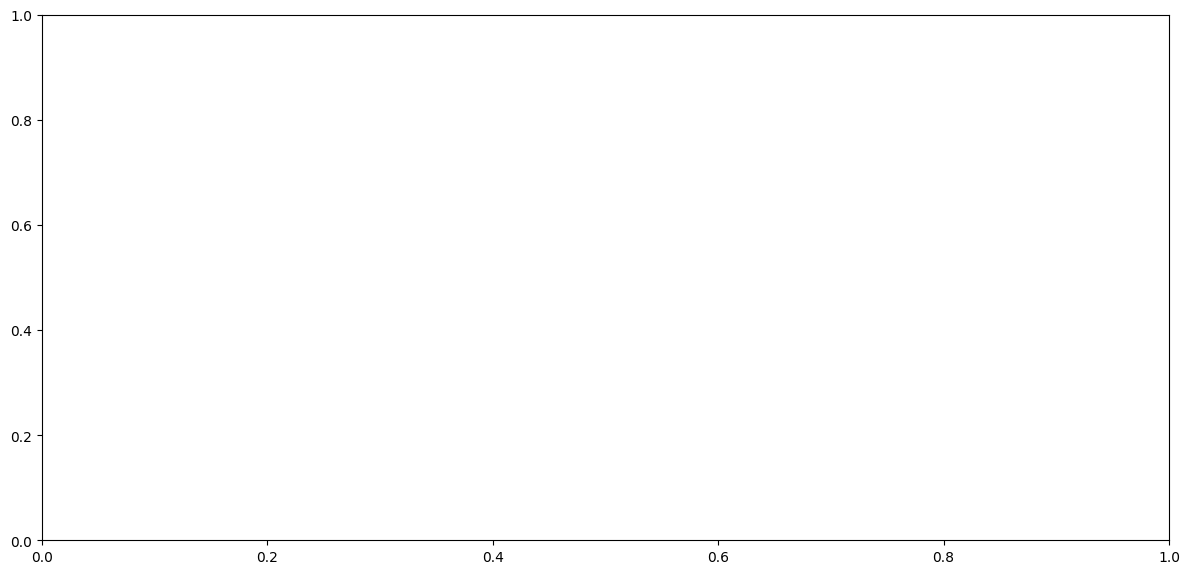

[   action    rewards                                               info
 0      17   0.300000  {'initial_state': {'e8b8d6b4-9078-4fff-b039-b9...
 1      20   0.464600  {'initial_state': {'e8b8d6b4-9078-4fff-b039-b9...
 2      23   0.100000  {'initial_state': {'e8b8d6b4-9078-4fff-b039-b9...
 3      11   0.300000  {'initial_state': {'e8b8d6b4-9078-4fff-b039-b9...
 4       9   0.300000  {'initial_state': {'e8b8d6b4-9078-4fff-b039-b9...
 ..    ...        ...                                                ...
 66     14   0.397600  {'initial_state': {'e8b8d6b4-9078-4fff-b039-b9...
 67      0   0.000000  {'initial_state': {'e8b8d6b4-9078-4fff-b039-b9...
 68      0   0.000000  {'initial_state': {'e8b8d6b4-9078-4fff-b039-b9...
 69      0   0.436364  {'initial_state': {'e8b8d6b4-9078-4fff-b039-b9...
 70     14 -93.000000  {'initial_state': {'e8b8d6b4-9078-4fff-b039-b9...
 
 [71 rows x 3 columns]]

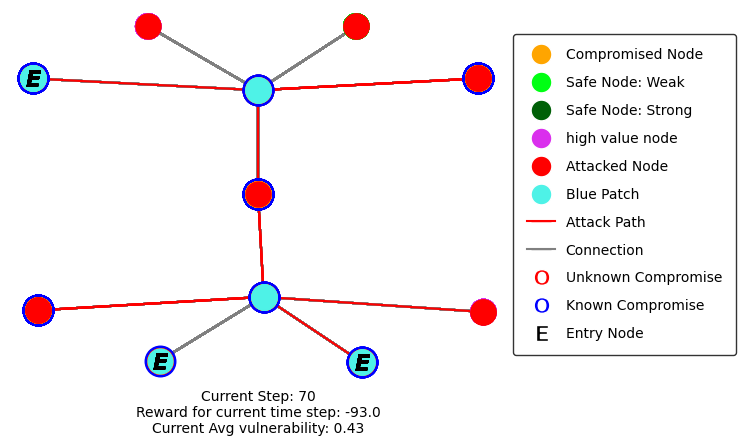

In [15]:
loop = ActionLoop(eval_env, agent, episode_count=1)
loop.gif_action_loop(save_gif=False, render_network=True)